In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout ,  Flatten , Dense, Activation, BatchNormalization, AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_dir = '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED' # Dataset directory in the drive   

#########################################################################################

train_set_dir = os.path.join(dataset_dir , 'Train') # Train directory

train_covid_dir = os.path.join(train_set_dir , 'COVID19') # Train Covid_19 subfolder

train_normal_dir = os.path.join(train_set_dir , 'NORMAL') # Train Νormal subfolder
#########################################################################################

test_set_dir = os.path.join(dataset_dir , 'Test') # Test directory

test_covid_dir = os.path.join(test_set_dir , 'COVID19') # Test Covid_19 subfolder

test_normal_dir = os.path.join(test_set_dir , 'NORMAL') # Test Normal subfolder



#print the filenames

train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])



['COVID-1000 - Copy (2).png', 'COVID-1003 - Copy (2).png', 'COVID-1033 - Copy (2).png', 'COVID-1044 - Copy (2).png', 'COVID-1030 - Copy (2).png', 'COVID-1039 - Copy (2).png', 'COVID-1040 - Copy (2).png', 'COVID-1053 - Copy (2).png', 'COVID-1050 - Copy (2).png', 'COVID-1068 - Copy (2).png']
['CHNCXR_0027_0.png', 'CHNCXR_0028_0.png', 'CHNCXR_0029_0.png', 'CHNCXR_0030_0.png', 'CHNCXR_0031_0.png', 'CHNCXR_0032_0.png', 'CHNCXR_0033_0.png', 'CHNCXR_0034_0.png', 'CHNCXR_0035_0.png', 'CHNCXR_0036_0.png']
['COVID-1002 - Copy (2).png', 'COVID-733 - Copy (2).png', 'COVID-728 - Copy (2).png', 'COVID-750.png', 'COVID-764 - Copy (2).png', 'COVID-756 - Copy (2).png', 'COVID-795.png', 'COVID-801 - Copy (2).png', 'COVID-819 - Copy (2).png', 'COVID-789 - Copy (2).png']
['CHNCXR_0001_0.png', 'CHNCXR_0004_0.png', 'CHNCXR_0005_0.png', 'CHNCXR_0006_0.png', 'CHNCXR_0007_0.png', 'CHNCXR_0008_0.png', 'CHNCXR_0009_0.png', 'CHNCXR_0010_0.png', 'CHNCXR_0012_0.png', 'CHNCXR_0013_0.png']


In [ ]:
print(f"The total number of images in the Training set is {len(train_covid_names+train_normal_names)}, COVID19 : {len(train_covid_names)} , NORMAL : {len(train_normal_names)}")

print(f"The total number of images in the Test set is {len(test_covid_names+test_normal_names)}, COVID19 : {len(test_covid_names)} , NORMAL : {len(test_normal_names)}")

The total number of images in the Training set is 644, COVID19 : 344 , NORMAL : 300
The total number of images in the Test set is 52, COVID19 : 26 , NORMAL : 26


['/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1000 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1003 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1033 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1044 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1030 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1039 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1040 - Copy (2).png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/COVID19/COVID-1053 - Copy (2).png']
['/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/NORMAL/CHNCXR_0027_0.png', '/content/drive/MyDrive/ORIGINAL DTS THAT WAS SEGMENTED/Train/NORMAL/CHNCXR_0028_0.png', '/content/drive/MyDrive/ORIGINAL DTS

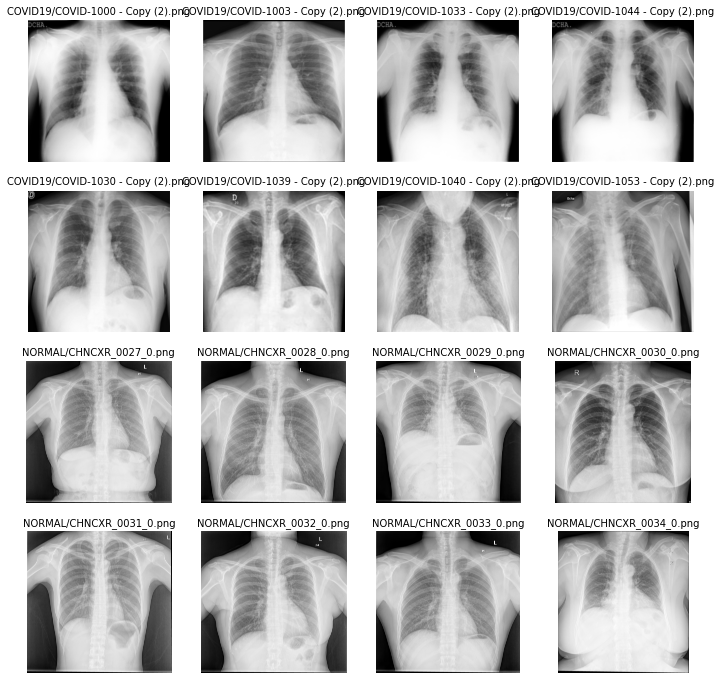

In [ ]:

# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list


merged_list = covid_pic+ normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)

  plt.imshow(img,cmap ='gray')

plt.show()

In [ ]:
 
dgen_train = ImageDataGenerator(rescale =  1./255, 
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_set_dir,
                                                 target_size=(256,256),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode ='binary')

validation_generator = dgen_train.flow_from_directory(train_set_dir,
                                                 target_size=(256,256),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode ='binary')

test_generator = dgen_test.flow_from_directory(test_set_dir,
                                                 target_size=(256,256),
                                                 batch_size = 32,
                                                 shuffle = False,
                                                 class_mode ='binary')

Found 516 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [ ]:
train_generator.class_indices


{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(256, 256, 3)

In [ ]:
IMG_W = 256
IMG_H = 256
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 32 
"32"
BATCH_SIZE = 40

In [ ]:
"""

model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (256,256,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(1, activation="sigmoid"))

"""
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = INPUT_SHAPE, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))

#model.add(Dense(1, activation='linear'))
#model.compile(loss='mse', optimizer='adam')

model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

# compile 


model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

"""

###########################################################################model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

"""
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 48)      13872     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 48)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        27712     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 59, 59, 64)       

In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = EPOCHS)

Epoch 1/32
17/17 [==============================] - 42s 2s/step - loss: 2.3338 - accuracy: 0.5233 - val_loss: 0.6846 - val_accuracy: 0.4688
Epoch 2/32
17/17 [==============================] - 39s 2s/step - loss: 0.9702 - accuracy: 0.5562 - val_loss: 0.6094 - val_accuracy: 0.7188
Epoch 3/32
17/17 [==============================] - 39s 2s/step - loss: 0.6467 - accuracy: 0.6550 - val_loss: 0.5963 - val_accuracy: 0.6953
Epoch 4/32
17/17 [==============================] - 39s 2s/step - loss: 0.9028 - accuracy: 0.6609 - val_loss: 0.5699 - val_accuracy: 0.8359
Epoch 5/32
17/17 [==============================] - 39s 2s/step - loss: 0.6208 - accuracy: 0.6977 - val_loss: 0.5644 - val_accuracy: 0.7500
Epoch 6/32
17/17 [==============================] - 39s 2s/step - loss: 0.6715 - accuracy: 0.6570 - val_loss: 0.6243 - val_accuracy: 0.6875
Epoch 7/32
17/17 [==============================] - 40s 2s/step - loss: 0.5967 - accuracy: 0.6957 - val_loss: 0.6619 - val_accuracy: 0.8359
Epoch 8/32
17/17 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

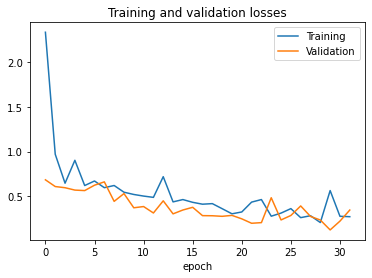

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

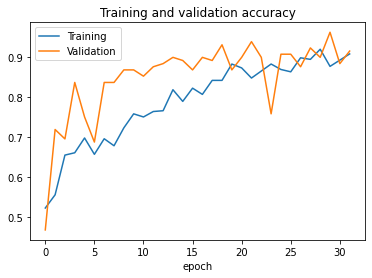

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss , test_accuracy = model.evaluate(test_generator)
print('test loss : {} test accuracy : {}'.format(test_loss,test_accuracy))

2/2 [==============================] - 3s 2s/step - loss: 0.1553 - accuracy: 0.9231
test loss : 0.15525473654270172 test accuracy : 0.9230769276618958


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[22  4]
 [ 0 26]]
Classification Report
              precision    recall  f1-score   support

       Covid       1.00      0.85      0.92        26
      Normal       0.87      1.00      0.93        26

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



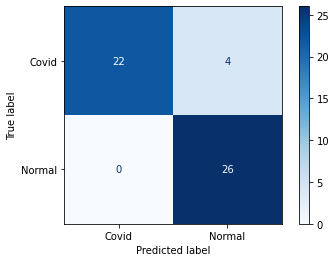

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict_generator(test_generator, 52 // 32+1)
y_pred = np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covid', 'Normal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
model.save_weights("best_model_weights.h5")

In [ ]:
model.save("best_model.h5")